## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ['CUDA-VISIBLE-DEVICES']=''

Using TensorFlow backend.


In [3]:
train,test=keras.datasets.cifar10.load_data()

In [9]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x,flatten=True):
    a=x.min()
    b=x.max()
    x=(x-a)/(b-a)
    if flatten:
        x=x.reshape((len(x),-1))
    return x
def preproc_y(y,num_classes=10):
    if y.shape[-1]==1:
        y=keras.utils.to_categorical(y,num_classes)
    return y
                                    

In [10]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128,64,32]):
    input_layer=keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurons):
        if i ==0:
            x=keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
        else:
            x=keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
    out=keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    return model
model=build_mlp(input_shape=x_train.shape[1:])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [13]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [14]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [15]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 89s 2ms/step - loss: 1.9949 - acc: 0.2666 - val_loss: 1.8277 - val_acc: 0.3423
Epoch 2/100
50000/50000 [==============================] - 68s 1ms/step - loss: 1.7487 - acc: 0.3693 - val_loss: 1.6783 - val_acc: 0.3951
Epoch 3/100
50000/50000 [==============================] - 69s 1ms/step - loss: 1.6416 - acc: 0.4122 - val_loss: 1.6111 - val_acc: 0.4258
Epoch 4/100
50000/50000 [==============================] - 69s 1ms/step - loss: 1.5889 - acc: 0.4309 - val_loss: 1.5708 - val_acc: 0.4371
Epoch 5/100
50000/50000 [==============================] - 69s 1ms/step - loss: 1.5314 - acc: 0.4521 - val_loss: 1.5237 - val_acc: 0.4527
Epoch 6/100
50000/50000 [==============================] - 93s 2ms/step - loss: 1.4958 - acc: 0.4635 - val_loss: 1.5495 - val_acc: 0.4463
Epoch 7/100
50000/50000 [==============================] - 73s 1ms/step - 

50000/50000 [==============================] - 77s 2ms/step - loss: 0.5541 - acc: 0.8010 - val_loss: 2.0326 - val_acc: 0.5188
Epoch 60/100
50000/50000 [==============================] - 66s 1ms/step - loss: 0.5590 - acc: 0.7987 - val_loss: 2.0535 - val_acc: 0.5094
Epoch 61/100
50000/50000 [==============================] - 67s 1ms/step - loss: 0.5394 - acc: 0.8054 - val_loss: 2.0691 - val_acc: 0.5076
Epoch 62/100
50000/50000 [==============================] - 66s 1ms/step - loss: 0.5374 - acc: 0.8069 - val_loss: 2.0203 - val_acc: 0.5161
Epoch 63/100
50000/50000 [==============================] - 85s 2ms/step - loss: 0.5242 - acc: 0.8134 - val_loss: 2.0997 - val_acc: 0.5133
Epoch 64/100
50000/50000 [==============================] - 70s 1ms/step - loss: 0.5164 - acc: 0.8127 - val_loss: 2.0966 - val_acc: 0.5091
Epoch 65/100
50000/50000 [==============================] - 67s 1ms/step - loss: 0.5224 - acc: 0.8106 - val_loss: 2.1362 - val_acc: 0.5084
Epoch 66/100
50000/50000 [==============

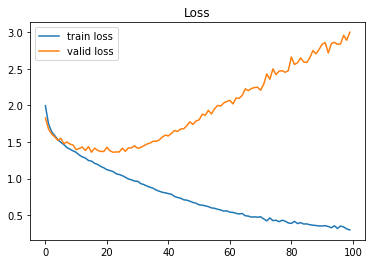

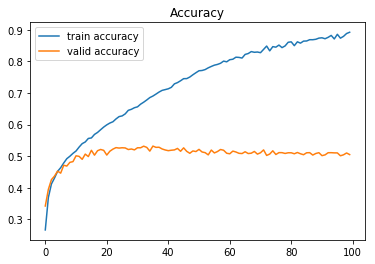

In [17]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()